In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline  

"""
pip3 install shapely==1.5.17.post1
pip3 install geopandas==0.2.1
pip3 install geojsonio==0.0.3
pip3 install pysal
"""

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [2]:
data_path='dataset/'
with open(data_path+'business.json', 'rb') as f:
    yelp = f.readlines()  
len(yelp)

174567

In [3]:
data_path='dataset/'
with open(data_path+'business.json', 'rb') as f:
    yelp = f.readlines()
print(yelp[0])
yelp=''.join(str(yelp))

b'{"business_id": "FYWN1wneV18bWNgQjJ2GNg", "name": "Dental by Design", "neighborhood": "", "address": "4855 E Warner Rd, Ste B9", "city": "Ahwatukee", "state": "AZ", "postal_code": "85044", "latitude": 33.3306902, "longitude": -111.9785992, "stars": 4.0, "review_count": 22, "is_open": 1, "attributes": {"AcceptsInsurance": true, "ByAppointmentOnly": true, "BusinessAcceptsCreditCards": true}, "categories": ["Dentists", "General Dentistry", "Health & Medical", "Oral Surgeons", "Cosmetic Dentists", "Orthodontists"], "hours": {"Friday": "7:30-17:00", "Tuesday": "7:30-17:00", "Thursday": "7:30-17:00", "Wednesday": "7:30-17:00", "Monday": "7:30-17:00"}}\n'


In [4]:
columns=["business_id", "name", "city", "state", "postal_code", "latitude", "longitude", "categories"]
data=pd.DataFrame(columns=columns)
data.head()

,business_id,name,city,state,postal_code,latitude,longitude,categories


In [5]:
for col in columns:
    data[col]=re.findall('"'+col+'": [\[]*(.*?["]*[\]]*["]*[^:]+),', yelp)
    data[col]=data[col].str.replace('"', '').str.replace("\\'s",'s').str.replace("\\","").str.replace('null', '-999')
    if col == 'latitude' or col == 'longitude':
        data[col]=data[col].astype(float)
data[:10]

,business_id,name,city,state,postal_code,latitude,longitude,categories
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,Ahwatukee,AZ,85044,33.330690,-111.978599,"Dentists, General Dentistry, Health & Medical,..."
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,McMurray,PA,15317,40.291685,-80.104900,"Hair Stylists, Hair Salons, Mens Hair Salons, ..."
2,KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle,Phoenix,AZ,85017,33.524903,-112.115310,"Departments of Motor Vehicles, Public Services..."
3,8DShNS-LuFqpEWIp0HxijA,Sports Authority,Tempe,AZ,85282,33.383147,-111.964725,"Sporting Goods, Shopping]"
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,Cuyahoga Falls,OH,44221,41.119535,-81.475690,"American (New), Nightlife, Bars, Sandwiches, A..."
5,o9eMRCWt5PkpLDE0gOPtcQ,Messina,Stuttgart,BW,70567,48.727200,9.147950,"Italian, Restaurants]"
6,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Las Vegas,NV,89128,36.207430,-115.268460,"Real Estate Services, Real Estate, Home Servic..."
7,OD2hnuuTJI9uotcKycxg1A,Soccer Zone,Las Vegas,NV,89128,36.197484,-115.249660,"Shopping, Sporting Goods]"
8,EsMcGiZaQuG1OOvL9iUFug,Any Given Sundae,Wexford,PA,15090,40.615102,-80.091349,"Coffee & Tea, Ice Cream & Frozen Yogurt, Food]"
9,TGWhGNusxyMaA4kQVBNeew,Detailing Gone Mobile,Henderson,NV,89014,36.055825,-115.046350,"Automotive, Auto Detailing]"


In [6]:
restaurants=data[data["categories"].str.contains("Restaurant")]
print(len(restaurants))
restaurants[:10]

54630


,business_id,name,city,state,postal_code,latitude,longitude,categories
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,Cuyahoga Falls,OH,44221,41.119535,-81.475690,"American (New), Nightlife, Bars, Sandwiches, A..."
5,o9eMRCWt5PkpLDE0gOPtcQ,Messina,Stuttgart,BW,70567,48.727200,9.147950,"Italian, Restaurants]"
10,XOSRcvtaKc_Q5H1SAzN20A,East Coast Coffee,Houston,PA,15342,40.241548,-80.212815,"Breakfast & Brunch, Gluten-Free, Coffee & Tea,..."
14,fNMVV_ZX7CJSDWQGdOM8Nw,Showmars Government Center,Charlotte,NC,28202,35.221647,-80.839345,"Restaurants, American (Traditional)]"
15,l09JfMeQ6ynYs5MCJtrcmQ,Alize Catering,Toronto,ON,M4P 2H6,43.711399,-79.399339,"Italian, French, Restaurants]"
19,Gu-xs3NIQTj3Mj2xYoN2aw,Maxim Bakery & Restaurant,Richmond Hill,ON,L4C 9V4,43.867565,-79.412662,"French, Food, Bakeries, Restaurants]"
25,1K4qrnfyzKzGgJPBEcJaNQ,Chula Taberna Mexicana,Toronto,ON,M4M 3A6,43.669256,-79.335902,"Tiki Bars, Nightlife, Mexican, Restaurants, Bars]"
28,Dj0S-Oe4ytRJzMGUPgYUkw,Panera Bread,Elyria,OH,44035,41.343078,-82.067140,"Soup, Salad, Sandwiches, Restaurants]"
29,gAy4LYpsScrj8POnCW6btQ,Toast Cafe,Fort Mill,SC,29708,35.047287,-80.990559,"Food, American (Traditional), Coffee & Tea, Re..."
30,nbhBRhZtdaZmMMeb2i02pg,Sunnyside Grill,Toronto,ON,M3J 3K5,43.781816,-79.490433,"Restaurants, Breakfast & Brunch]"


In [7]:
top10=restaurants['name'].value_counts()[:10]
top10

McDonalds                 749
Subway                    685
Pizza Hut                 301
Taco Bell                 292
Burger King               289
Wendys                    259
Dominos Pizza             220
Chipotle Mexican Grill    175
KFC                       165
Panera Bread              156
Name: name, dtype: int64

In [14]:
top10=restaurants['city'].value_counts()[:10]
top10

Toronto         7148
Las Vegas       5902
Phoenix         3652
Montru00e9al    3332
Charlotte       2461
Pittsburgh      2208
Edinburgh       1502
Scottsdale      1451
Cleveland       1364
Mississauga     1304
Name: city, dtype: int64

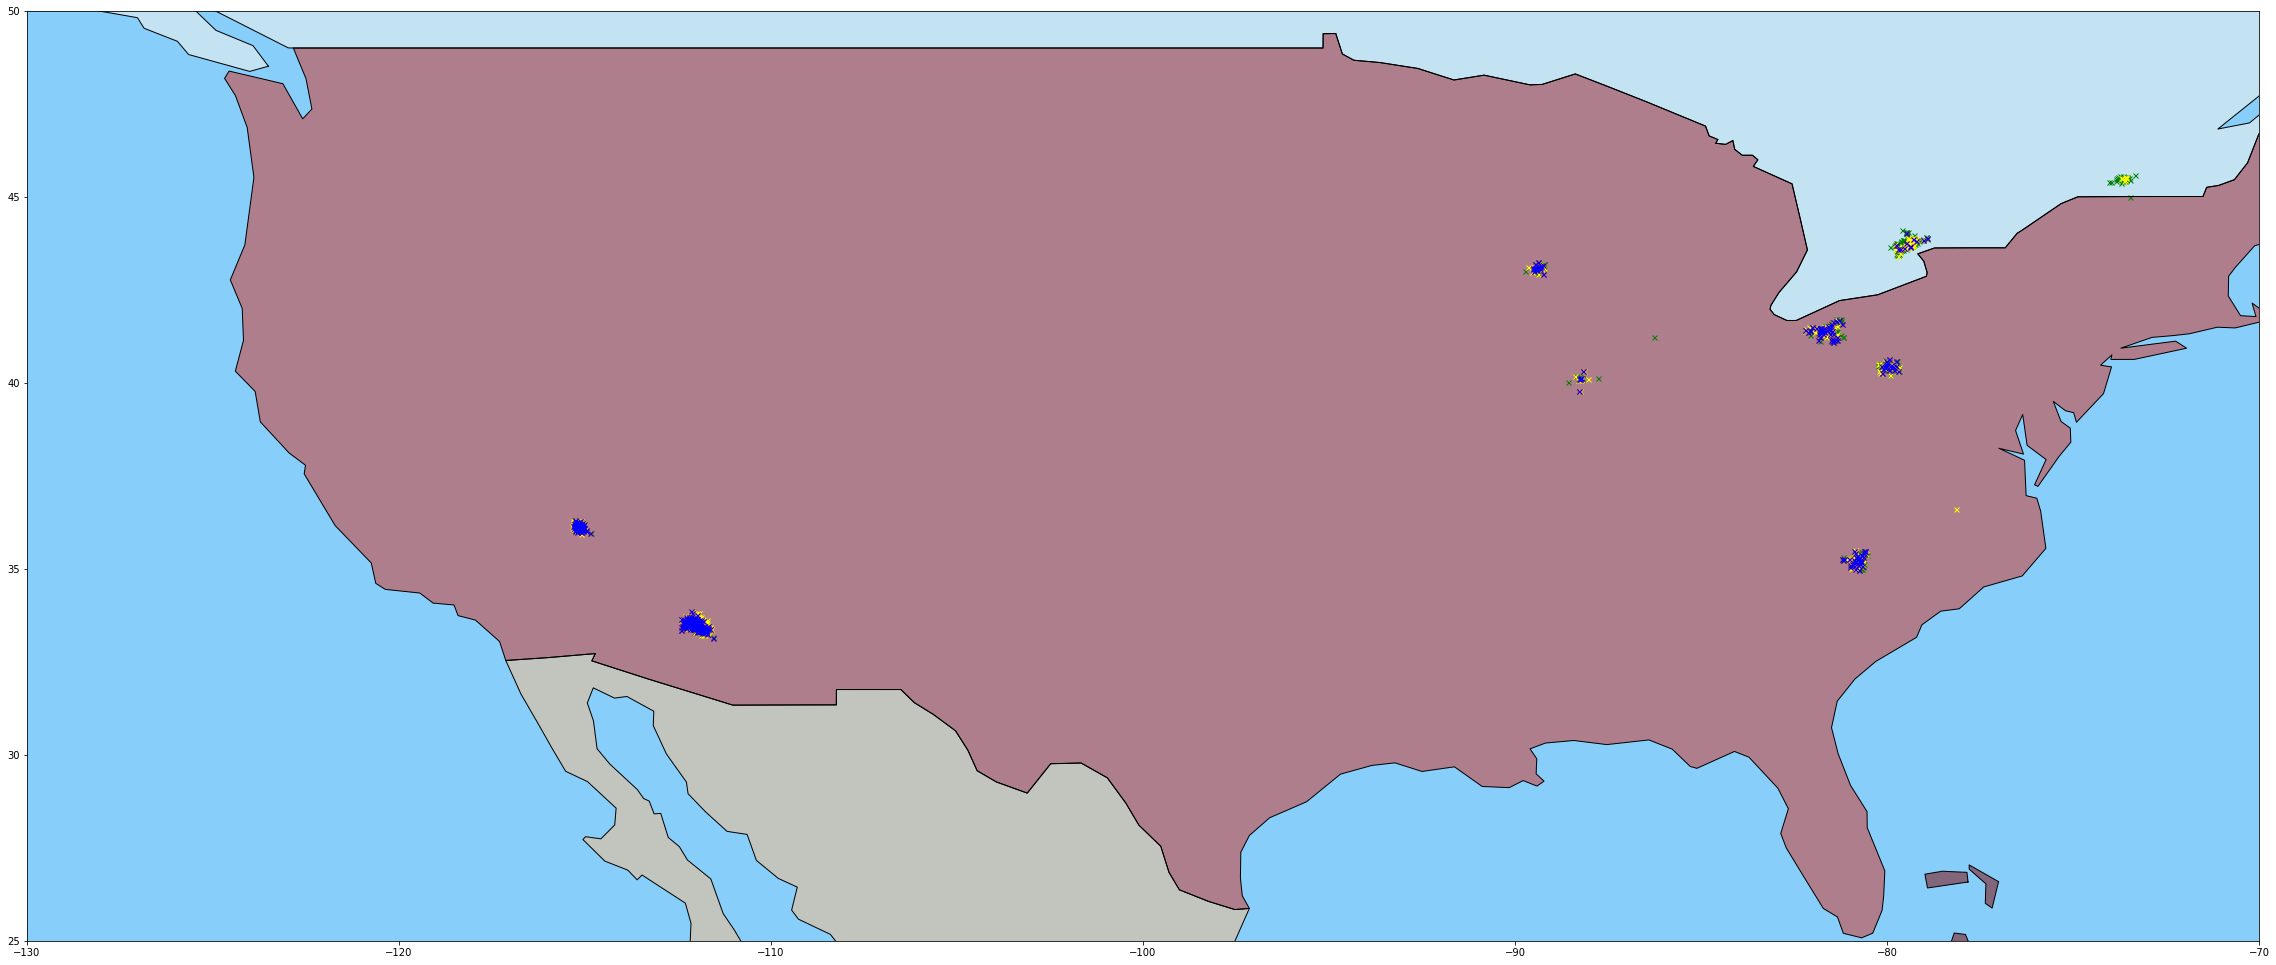

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(40, 20))

water = 'lightskyblue'
earth = 'cornsilk'

ax.set_facecolor(water)

ax.set_aspect('equal')

ax.set_xlim([-130, -70])
ax.set_ylim([25, 50])

for brand in [('McDonalds','green'),('Subway','yellow'),('Taco Bell','red'),('Taco Bell','blue')]:
    brand,color = brand
    franchise=data[data["name"]==brand]
    geometry = [Point(xy) for xy in zip(franchise['longitude'],franchise['latitude'])]
    cities = GeoDataFrame(franchise, crs=world.crs, geometry=geometry)
    cities.plot(ax=ax, marker='x', color=color, markersize=5)

world.plot(ax=ax, cmap='OrRd')
plt.show()

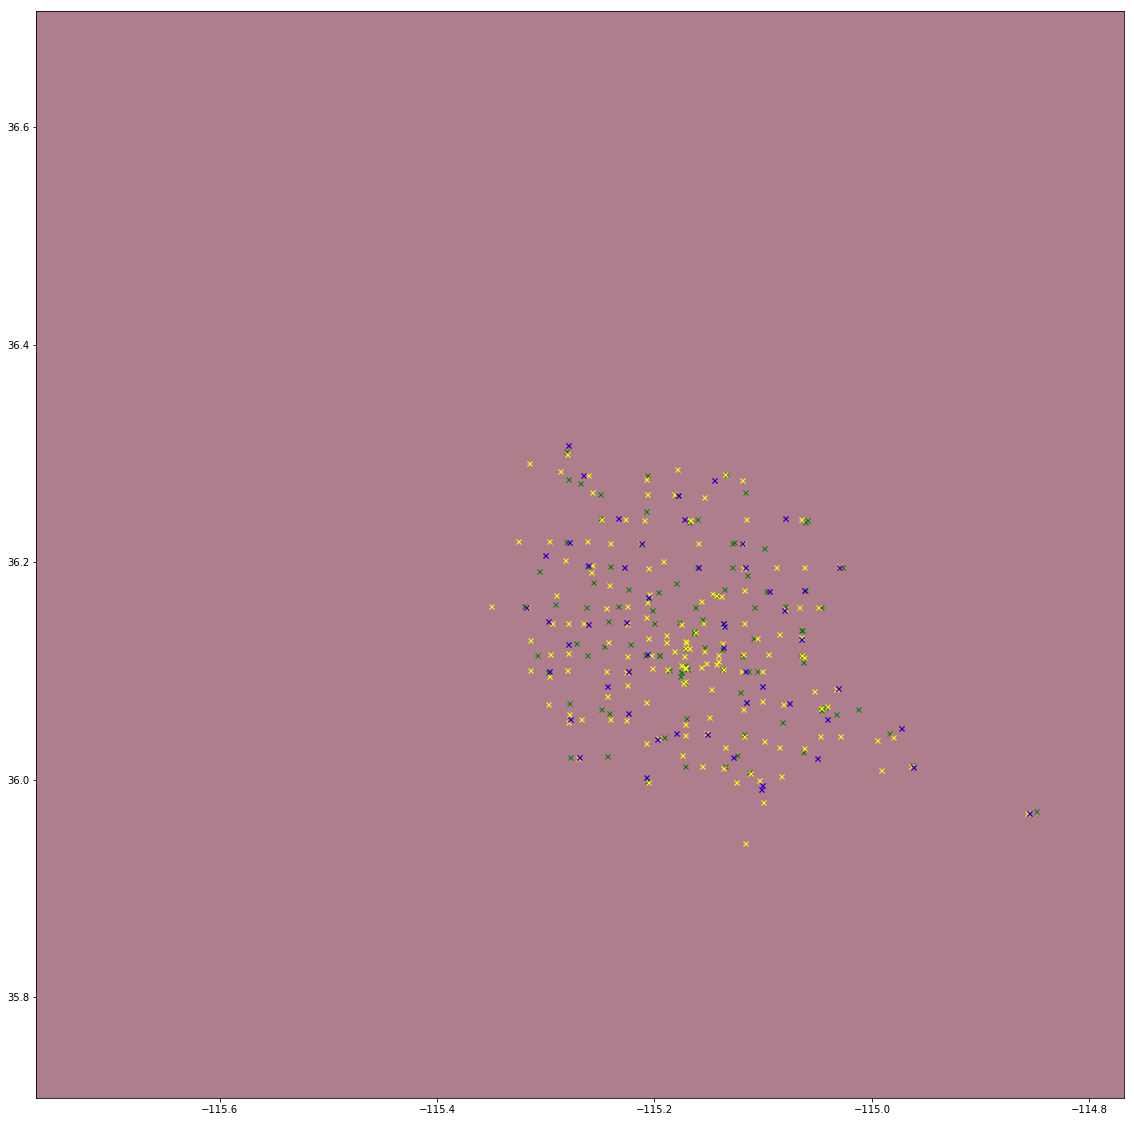

In [10]:
detail='Las Vegas'

city=data[data["city"].str.contains(detail)][:1]
y=float(city['latitude'])
x=float(city['longitude'])
y1=y-0.5
y2=y+0.5
x1=x-0.5
x2=x+0.5


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(40, 20))

water = 'lightskyblue'
earth = 'cornsilk'

ax.set_facecolor(water)

ax.set_aspect('equal')

ax.set_xlim([x1, x2])
ax.set_ylim([y1, y2])

for brand in [('McDonalds','green'),('Subway','yellow'),('Taco Bell','red'),('Taco Bell','blue')]:
    brand,color = brand
    franchise=data[data["name"]==brand]
    geometry = [Point(xy) for xy in zip(franchise['longitude'],franchise['latitude'])]
    cities = GeoDataFrame(franchise, crs=world.crs, geometry=geometry)
    cities.plot(ax=ax, marker='x', color=color, markersize=5)

world.plot(ax=ax, cmap='OrRd')
plt.show()

In [11]:
"""
If you have an API Key .......
"""

import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key='Add Your Key here')

# Look up an address with reverse geocoding
reverse_geocode_result = gmaps.reverse_geocode((x, y))

# Request directions via public transit
now = datetime.now()
directions_result = gmaps.directions("Sydney Town Hall",
                                     "Parramatta, NSW",
                                     mode="transit",
                                     departure_time=now)

ValueError: Invalid API key provided.

In [ ]:
x,y

In [ ]:
# McDonalds
detail='Las Vegas'

city=data[data["city"].str.contains(detail)][:1]
y=float(city['latitude'])
x=float(city['longitude'])
y1=y-0.1
y2=y+0.1
x1=x-0.1
x2=x+0.1


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(40, 20))

water = 'lightskyblue'
earth = 'cornsilk'

ax.set_facecolor(water)

ax.set_aspect('equal')

ax.set_xlim([x1, x2])
ax.set_ylim([y1, y2])

for brand in [('McDonalds','yellow')]:
    brand,color = brand
    franchise=data[data["name"]==brand]
    geometry = [Point(xy) for xy in zip(franchise['longitude'],franchise['latitude'])]
    cities = GeoDataFrame(franchise, crs=world.crs, geometry=geometry)
    cities.plot(ax=ax, marker='x', color=color, markersize=5)

world.plot(ax=ax, cmap='OrRd')
plt.show()

<img src="https://www.dropbox.com/s/5kecgoql9mqkjep/yelpgoogle.jpg?raw=1" />